In [3]:
# IMPORT DATA
from google.colab import drive
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/drive')

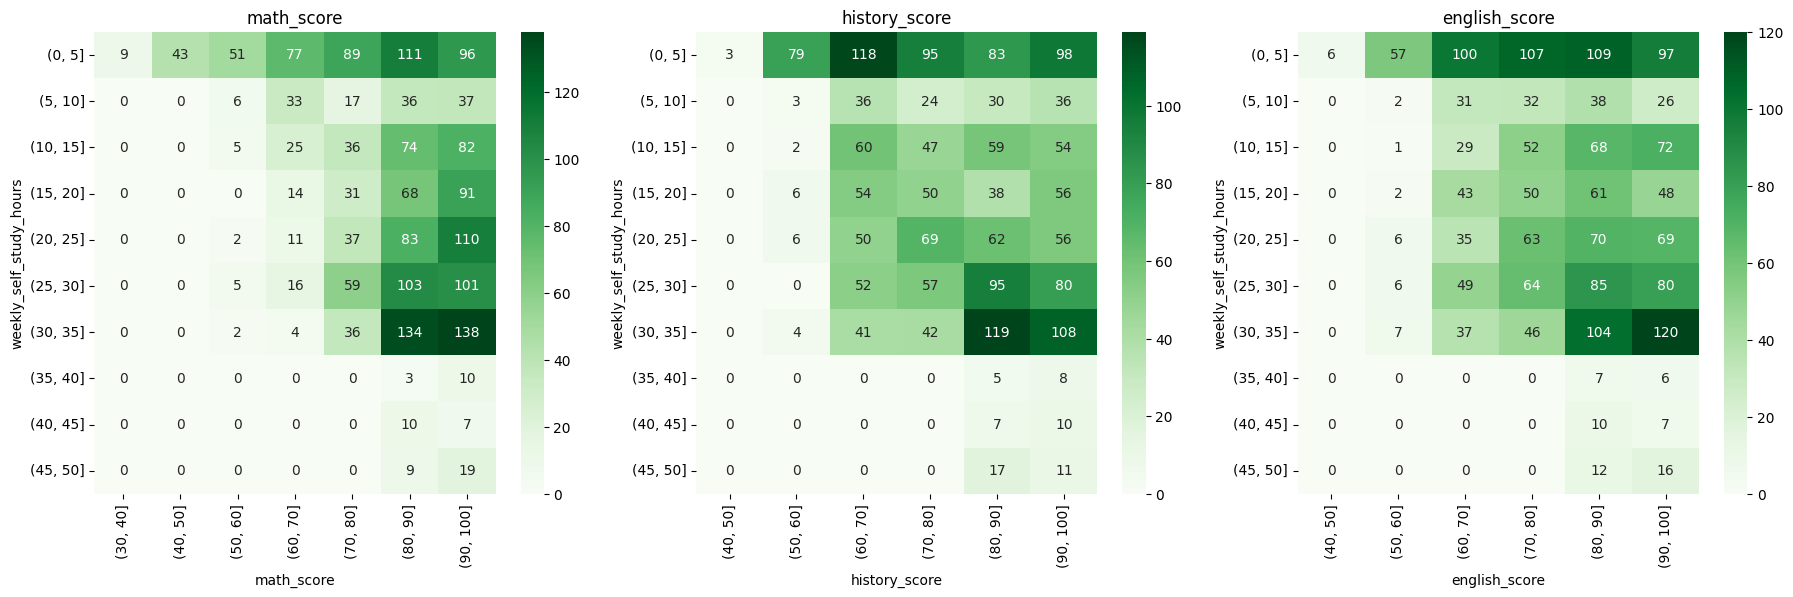

In [7]:
# Load Data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/student-scores.csv')

# Group variables of study
all_subjects = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']
for subject in all_subjects:
  df[subject] = pd.cut(df[subject], list(range(0, 110, 10))).astype(str)

df['weekly_self_study_hours'] = pd.cut(df['weekly_self_study_hours'], list(range(0, 55, 5))).astype(str)

# Generate Heatmaps for Math/History/English
plt.figure(figsize=[22, 6])
for i, subject in enumerate(['math_score', 'history_score', 'english_score']):
  # Group data data marks
  gp_df = df.groupby(['weekly_self_study_hours', subject]).count()['id'].reset_index(level=[0, 1])
  gp_df = gp_df.pivot(index="weekly_self_study_hours", columns=subject, values="id")
  gp_df = gp_df.fillna(0)
  gp_df = gp_df.drop('nan')
  reindex = ['(0, 5]', '(5, 10]', '(10, 15]', '(15, 20]', '(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 45]', '(45, 50]']
  gp_df = gp_df.reindex(reindex)

  # Plot Data
  ax = plt.subplot(1, 3, i+1)
  sns.heatmap(gp_df, annot=True, fmt='.0f', cmap="Greens", ax=ax);
  plt.title(subject)
  ax.tick_params(axis='x', rotation=90)

images_dir = '/content/drive/My Drive/Colab Notebooks'
plt.savefig(f"{images_dir}/heat_map.png")
plt.show()